# OK Cupid. Clustering Users With Unsupervised Learning

The purpose of the project is to make clustering with the users of the dataset, trying to find people similar to a particular user. The outcome should be a list of people with affinity with one particular user.

First of all, we need to gain insight about the dataset 'profiles.csv' provided by Codecademy.
The steps to do that as are follows:
* Perform EDA (Exploratory Data Analysis)
* Perform data wrangling, cleaning and tyding
* Try to answer some questions, make predictions using ML techniques



Let's go!

# Lessons learned

* It is difficult to cope with the lack of data. Example: People that do not declare income: 81%
* It has been decided to fill missing values in the features of interest, usually with the median value of the column.
* Moreover, I have decided to group values in some features in a few choices. For example, body_type has been reduced from 12 to just 3 values. This can produce a lack of accuracy.
* I have not considered several features: income and offspring (due to missing data in most of the users), ethnicity (not transformable in numerical data), sign, location, etc. Also, it is possible to improve the clustering applying NLP to text columns (essay0-essay9) And so the model could be further improved taking into account these features. 

## Import necessary modules

In [10]:
from pprint import pprint
import numpy as np
import re
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
import plotly.graph_objects as go

## EDA

In [2]:
profiles = pd.read_csv('./okcupid_profiles.csv')
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

## Data wrangling and tyding

We can now transform some columns into (ordered) Categorical data, in order to have numerical values. 

It seems a good idea to copy the data into a new DataFrame. In this way we can have the original data even though we modify the dataset.

In [3]:
df = profiles.copy()

In [4]:
# Convert inches to cm
df.height = df.height.apply(lambda x: round(x * 2.54, 0))

In [5]:
df.describe()

,age,height,income
count,59946.000000,59943.00000,59946.000000
mean,32.340290,173.45997,20033.222534
std,9.452779,10.10919,97346.192104
min,18.000000,3.00000,-1.000000
25%,26.000000,168.00000,-1.000000
50%,30.000000,173.00000,-1.000000
75%,37.000000,180.00000,-1.000000
max,110.000000,241.00000,1000000.000000


In [14]:
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


### Missing values

In [6]:
mask = df.height.isna()
df.loc[mask,'height'] = df.height.median()

In [7]:
df.loc[df.income == -1, 'income'] = np.NaN

In [8]:
print(f'People that do not declare income: {df.income.isna().sum()/len(df):0.0%}')

People that do not declare income: 81%


In [9]:
isna_cols = df.loc[:,df.isna().any()].columns
missing_values = df[isna_cols[:12]].isna().sum().sort_values(ascending=False)

In [17]:
type(missing_values)

pandas.core.series.Series

In [19]:
dfMissing = missing_values.reset_index()
dfMissing.columns = ['Feature', 'Count']
dfMissing['Percentage'] = dfMissing['Count'] / len(df)
dfMissing

,Feature,Count,Percentage
0,income,48442,0.808094
1,offspring,35561,0.593217
2,diet,24395,0.406950
3,religion,20226,0.337404
4,pets,19921,0.332316
5,drugs,14080,0.234878
6,sign,11056,0.184433
7,job,8198,0.136756
8,education,6628,0.110566
9,ethnicity,5680,0.094752


In [24]:
# Convert to DataFrame for Plotly
dfMissing = missing_values.reset_index()
dfMissing.columns = ['Feature', 'Count']
dfMissing['Percentage'] = round(dfMissing['Count'] * 100 / len(df), 2)

# Create bar plot
fig = px.bar(dfMissing, x='Feature', y='Count', text=dfMissing['Percentage'].apply(lambda x : f"{x} %"), 
             title='Missing values per feature (excluding essays)',
             labels={'Percentage': 'Percentage (%)'},
             color='Feature', color_discrete_sequence=px.colors.sequential.Darkmint)

# Annotate specific point
# fig.add_annotation(x='income', y=48000, text='81% of users do not declare income', 
#       showarrow=True, arrowhead=2, ax=50, ay=-100)

# Adjust layout
fig.update_layout(xaxis_tickangle=-70, xaxis_tickfont_size=13)

# Show plot
fig.show()

We can see in the picture that income and offspring have several missing values, I am not using these columns for the time being.

The columns that I consider more interesting in order to find a match are:

* **Age**. Numerical type already. To scale before 
* **Height.** Numerical type already. Nothing to do.
* **Body type**. We can convert this one to a ordered categorical type. 
* **Drinks**. To convert to ordered categorical.
* **Drugs**. To convert to ordered categorical.
* **Education**. To convert to ordered categorical.
* **Height**. Numerical type already.
* **Offspring**. To convert to ordered categorical.
* **Smokes**. To convert to ordered categorical.
* **Pets**. To create 2 new_columns: **likes_dog, likes_cat**

In order to not be discarding a lot of rows, I am going to fill the missing values with the category that corresponds to the median value of the categorical codes of the feature.

### Sex Distribution. Orientation

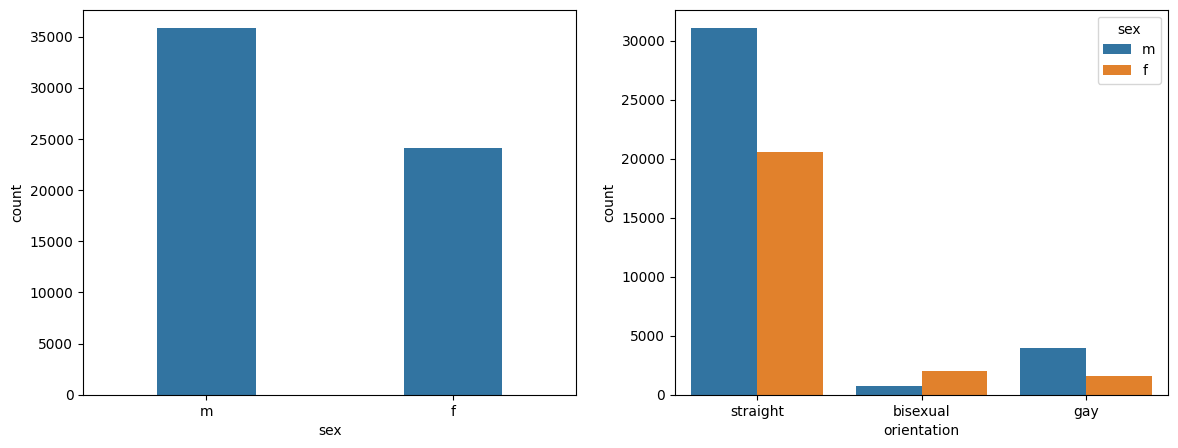

In [25]:
fig1, ax1 = plt.subplots(ncols=2,figsize=(14, 5))
cat_cols = ['sex', 'orientation']
titles = ['Sex distribution', 'Sexual orientation']

sns.countplot(data=df, x='sex', ax=ax1[0], width=0.4)
sns.countplot(data=df, x='orientation', hue='sex', ax=ax1[1])
fig1.savefig('figure_01.png');

### Numerical Features: Age, Height

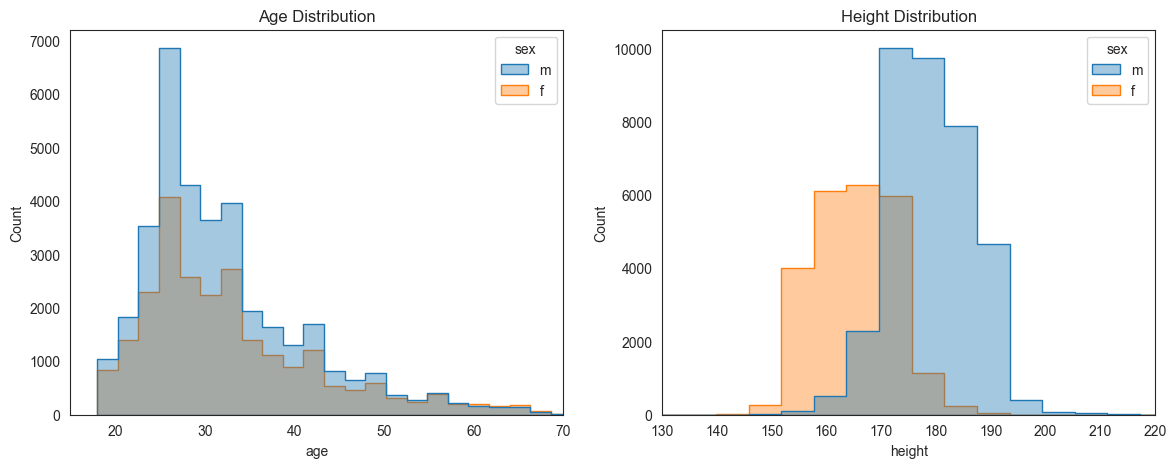

In [26]:
sns.set_style("white")
num_cols = ['age','height']
xlims = [(15, 70), (130,220)]
titles = ['Age Distribution', 'Height Distribution']
fig2, ax2 = plt.subplots(ncols=2, figsize=(14,5),sharey=False)
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=ax2[i], hue='sex', element='step',bins=40, alpha=0.4)
    ax2[i].set(xlim=xlims[i], title = titles[i])
fig2.savefig('figure_02.png')

### Location

In [27]:
df[['city_','state_']] = df.location.str.split(pat=', ',expand=True).loc[:,0:1]
df.loc[:,['location', 'city_', 'state_']]
df.state_.value_counts(normalize=True).round(4)[:5]*100

state_
california       99.85
new york          0.03
illinois          0.01
massachusetts     0.01
texas             0.01
Name: proportion, dtype: float64

In [28]:
city_count = df.city_.value_counts(normalize=True).round(3)[:20]*100

C:\Users\aadit\AppData\Local\Temp\ipykernel_38572\1856733128.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




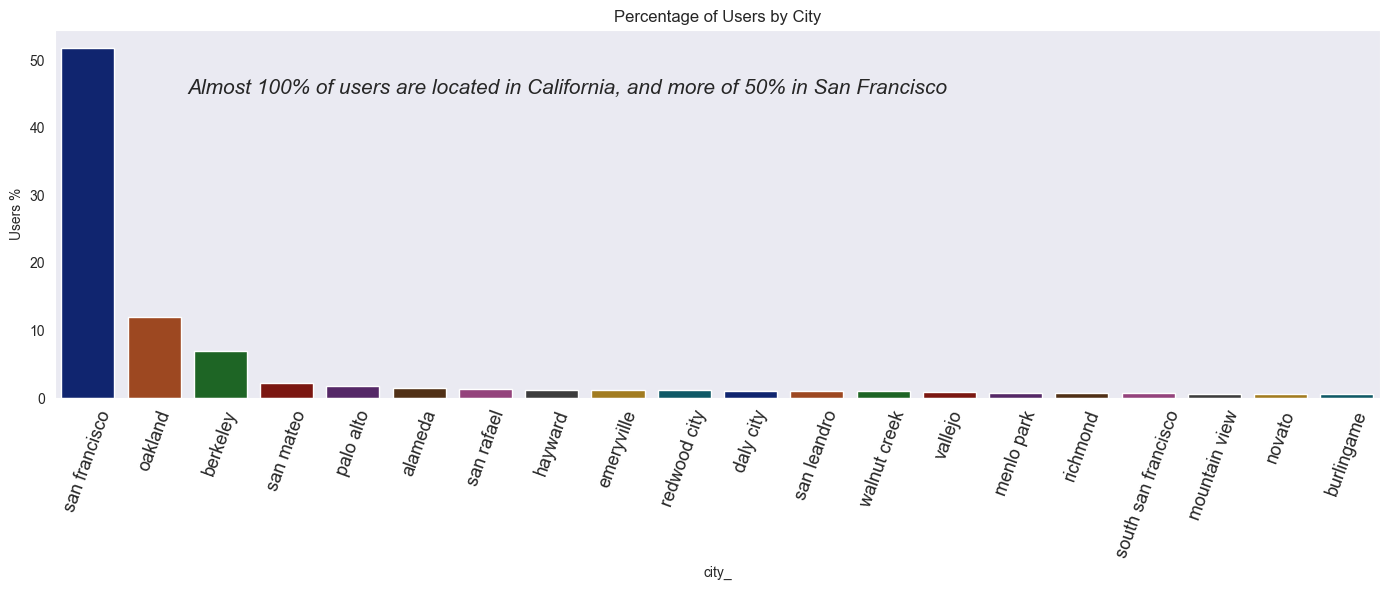

In [29]:
sns.set_style("dark")
fig3, ax3 = plt.subplots(figsize=(14,6))
sns.barplot(x=city_count.index, y=city_count, palette='dark', ax=ax3)
ax3.set(xticks=range(len(city_count)),title='Percentage of Users by City',ylabel = 'Users %')
ax3.set_xticklabels(labels=city_count.index, rotation=70,fontsize=13)
ax3.text(1.5, 45, 'Almost 100% of users are located in California, and more of 50% in San Francisco', 
         style='italic', fontsize=15);
fig3.tight_layout()
fig3.savefig('figure_03.png')

Almost 100% of users are located in California, and more of 50% in San Francisco

## Mapping categories

As there are columns that have several unique values, with the function below we can map strings into a selected group of few categories, using an ad-hoc dictionary for each feature.

I will use an underscore at the end of each handcrafted feature.

In [30]:
def map_cat(a_string, a_dic):
    ''' a_string: a string we want to map with a_dic
        a_dic: a dictionary whose keys are tuples'''
    for k in a_dic:
        if a_string in k:
            return a_dic.get(k)
    return np.NaN

### Body Type. Education

In [31]:
df.body_type.value_counts(dropna=False)

body_type
average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64

Too many body types in my opinion. Now we try grouping all these body types in just three categories, as described by medical literature. 

In [32]:
body_types_dic={('skinny','used up','thin'):'ectomorph',
               ('average','fit','athletic','jacked'):'mesomorph',
               ('a little extra','curvy','full figured'):'endomorph'}

body_categories = CategoricalDtype(categories=['ectomorph','mesomorph','endomorph'], ordered=True)

df['body_type_'] = df.body_type.apply(map_cat,args=(body_types_dic,)).astype(body_categories)
df.body_type_ = df.body_type_.fillna(body_categories.categories[int(np.median(df.body_type_.cat.codes))])

In [33]:
education_categories = CategoricalDtype(categories=['High school or less','Some college',
                                        'College or more','Post graduate degree'],
                                        ordered=True)

As I am Spaniard, not sure if the mapping of education levels are accurate. Apologies if I am mistaken, I'm doing my best guessing here.

In [34]:
education_dic= {('graduated from high school','dropped out of high school', 
                 'working on high school','high school'): 'High school or less',
                
                ('working on two-year college','dropped out of space camp',
                'two-year college', 'graduated from two-year college',
                'dropped out of college/university','dropped out of two-year college', 
                 'dropped out of med school', 'dropped out of law school'): 'Some college',
                
                ('working on college/university', 'working on space camp',
                'graduated from masters program','graduated from college/university',
                'working on masters program','graduated from space camp',
                'college/university','graduated from law school', 
                 'working on ph.d program','space camp', 
                 'graduated from med school','working on med school',
                'masters program', 'dropped out of ph.d program',
                'law school','dropped out of masters program',
                'working on law school', 'med school') : 'College or more', 
                
                ('graduated from ph.d program','ph.d program'): 'Post graduate degree'}
                

In [35]:
df['education_'] = df.education.apply(map_cat,args=(education_dic,)).astype(education_categories)

Let's assign the median value of the category to the missing values of this feature.

In [36]:
df.education_ = df.education_.fillna(education_categories.\
                                    categories[int(np.median(df['education_'].cat.codes))]).\
                                    astype(education_categories)

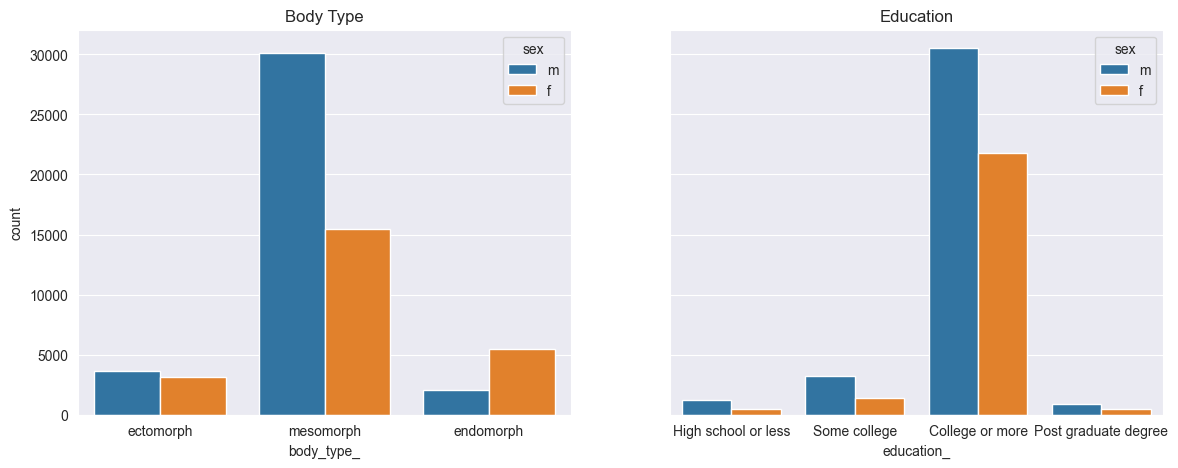

In [37]:
sns.set_style("darkgrid")
cat_cols = ['body_type_','education_']
titles = ['Body Type', 'Education']
fig4, ax4 = plt.subplots(ncols=2, figsize=(14,5),sharey=True)
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=ax4[i], hue='sex')
    ax4[i].set(title = titles[i])
fig4.savefig('figure_04.png')

### Drinks. Drugs. Smokes

In [38]:
drinks_categories = CategoricalDtype(categories=['not at all','rarely','socially',
                                                 'often','very often','desperately'],
                                     ordered=True)
df['drinks_'] = df.drinks.astype(drinks_categories)
df.drinks_ = df.drinks_.fillna(drinks_categories.categories[int(np.median(df.drinks_.cat.codes))])

In [39]:
df.drugs.value_counts(dropna=False)

drugs
never        37724
NaN          14080
sometimes     7732
often          410
Name: count, dtype: int64

In this case, 82% of the users declare that they never use drugs. Let's assume that we can fill the missing values with 'never'

In [40]:
df['drugs_'] = df.drugs.fillna('never')
df.drugs_.value_counts(dropna=False)
df.drugs_ = pd.Categorical(df.drugs_, categories=['never', 'sometimes','often'], ordered=True)

In [41]:
df.smokes.value_counts(dropna=False)

smokes
no                43896
NaN                5512
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64

We apply the same criteria as before, filling missing values with 'no'.

In [42]:
smokes_dic = {('no',):'no',
             ('sometimes', 'when drinking', 'trying to quit'):'sometimes',
              ('yes',):'yes'}
smokes_categories = CategoricalDtype(categories=['no', 'sometimes', 'yes'],ordered=True)
df['smokes_'] = df.smokes.apply(map_cat, args=(smokes_dic,)).astype(smokes_categories)
df.smokes_ = df.smokes_.fillna('no').astype(smokes_categories)
df.smokes_.value_counts(dropna=False).sort_index()

smokes_
no           49408
sometimes     8307
yes           2231
Name: count, dtype: int64

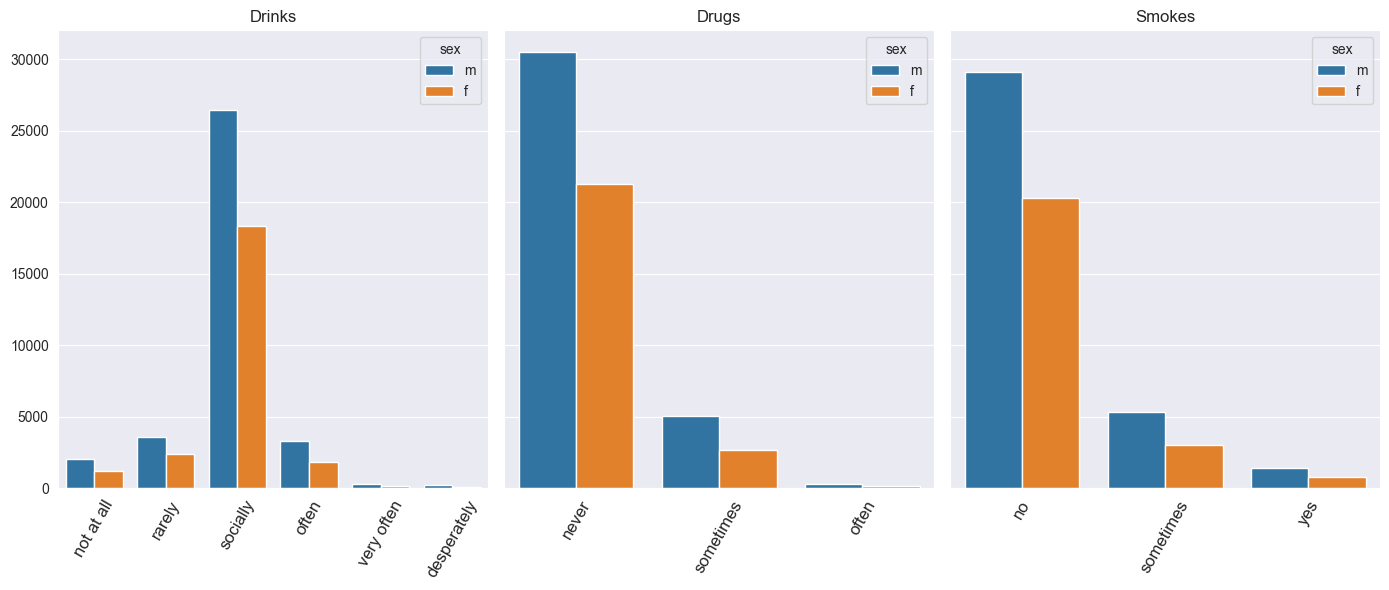

In [43]:
sns.set_style("darkgrid")
cat_cols = ['drinks_', 'drugs_', 'smokes_']
titles = ['Drinks', 'Drugs', 'Smokes']
xlabels = [ list(drinks_categories.categories), ['never', 'sometimes','often'], list(smokes_categories.categories) ]
ticks = [6, 3, 3]
fig5, ax5 = plt.subplots(ncols=3, figsize=(14,6),sharey=True)
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=ax5[i], hue='sex')
    ax5[i].set(title = titles[i], xticks = range(len(xlabels[i])) ,xlabel='', ylabel='')
    ax5[i].set_xticklabels(labels = xlabels[i], rotation=60,fontsize=12) 
fig5.tight_layout()
fig5.savefig('figure_05.png')

### Pets

In [44]:
df.pets.value_counts(dropna=False)

pets
NaN                                19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

It makes sense to create **two new columns: likes_dogs, likes_cats**. We assign 1 if the user has or likes the corresponding kind of pet, and 0 if he does not. Let's assign a 0 in case of missing values (np.NaN), in order to be in the safe zone on regards this feature.          

In [45]:
df.pets = df.pets.fillna('No')

In [46]:
def likes_pet(s, species):
    dogs_regex = re.compile(r'((?<!dis)likes |has )dogs')
    cats_regex = re.compile(r'((?<!dis)likes |has )cats')
    if species == 'dog':
        return 'Yes' if bool(dogs_regex.search(s)) else 'No'
    elif species == 'cat':
        return 'Yes' if bool(cats_regex.search(s)) else 'No'
    else:
        return 'No'

In [47]:
df['likes_dogs_'] = df.pets.apply(likes_pet,args = ('dog',))
df['likes_cats_'] = df.pets.apply(likes_pet,args = ('cat',))
df['likes_dogs_'] = pd.Categorical(df.likes_dogs_,categories=['No', 'Yes'],ordered=True)
df['likes_cats_'] = pd.Categorical(df.likes_cats_,categories=['No', 'Yes'],ordered=True)

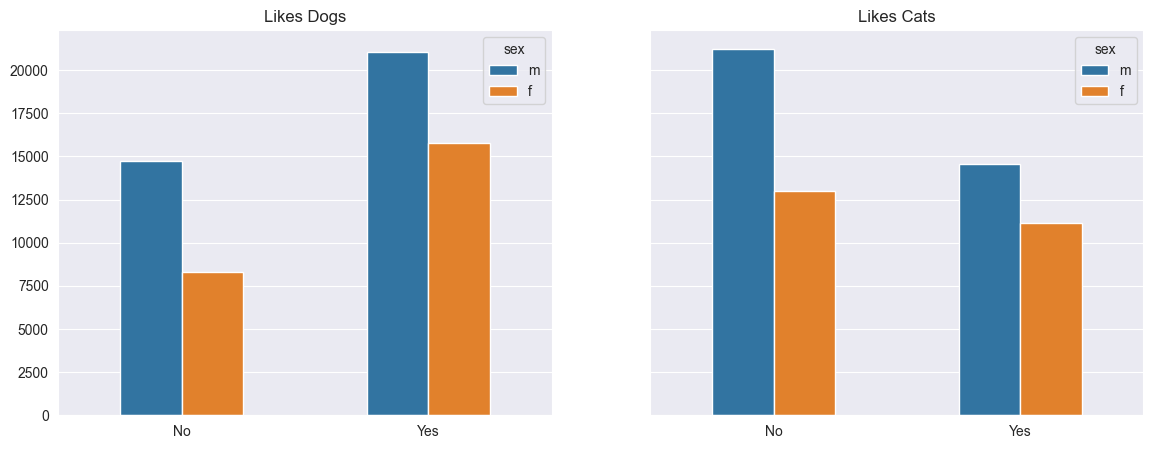

In [48]:
sns.set_style("darkgrid")
cat_cols = ['likes_dogs_', 'likes_cats_']
titles=['Likes Dogs', 'Likes Cats']
fig6, ax6 = plt.subplots(ncols=2, figsize=(14,5),sharey=True)
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=ax6[i], hue='sex', width=0.5)
    ax6[i].set(title = titles[i],xlabel='', ylabel='')
fig6.savefig('figure_06.png')

## Clustering Users. Unsupervised Learning

Now we have the features of interest as numerical values. And we can use a clustering algorithm in order to form groups of users with affinity. In this case we are going to apply k-means clustering with scikit-learn.

In [59]:
## export the pre-processed data for Unsupervised learning
features = ['age', 'height', 'body_type_', 'education_', 'drinks_', 'drugs_', 'smokes_', 'likes_dogs_', 'likes_cats_']
df.to_csv('okcupid_profiles_preprocessed.csv', index=False)

In [49]:
features = ['age', 'height', 'body_type_', 'education_', 'drinks_', 'drugs_', 'smokes_', 'likes_dogs_', 'likes_cats_']

In [50]:
X = df[features[0:2]].copy()
X.head()

,age,height
0,22,190.0
1,35,178.0
2,38,173.0
3,23,180.0
4,29,168.0


### Preparing numerical data

Now we transform the categorical data into numerical data, using the attribute cat.codes of the categorical features. 

In [54]:
for feat in features[2:]:
    X[feat] = df[feat].cat.codes

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.set_output(transform='pandas')

X_scaled = scaler.fit_transform(X)

In [55]:
X_scaled

,age,height,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_
0,-1.093898,1.636195,2.016104,0.249911,0.131148,-0.386863,1.599558,0.791039,1.153409
1,0.281370,0.449117,-0.024475,0.249911,1.581927,2.324884,-0.432939,0.791039,1.153409
2,0.598740,-0.045499,-2.065054,0.249911,0.131148,-0.386863,-0.432939,-1.264160,1.153409
3,-0.988108,0.646963,-2.065054,0.249911,0.131148,-0.386863,-0.432939,-1.264160,1.153409
4,-0.353369,-0.540115,-0.024475,0.249911,0.131148,-0.386863,-0.432939,0.791039,1.153409
...,...,...,...,...,...,...,...,...,...
59941,2.820327,-1.628271,-0.024475,0.249911,0.131148,-0.386863,-0.432939,0.791039,-0.866995
59942,-0.882318,0.943732,-0.024475,0.249911,1.581927,2.324884,-0.432939,0.791039,1.153409
59943,1.021900,0.646963,-0.024475,0.249911,-2.770412,-0.386863,-0.432939,-1.264160,-0.866995
59944,-0.564949,1.141579,-0.024475,0.249911,0.131148,5.036631,1.599558,0.791039,1.153409


### Inertia

As per [sklearn documentation](https://scikit-learn.org/dev/modules/generated/sklearn.cluster.KMeans.html), inertia is the _sum of squared distances of samples to their closest cluster center_.

In [38]:
num_clusters=list(np.arange(1, 21))

inertias = []

for k in num_clusters:
  model = KMeans(n_clusters = k, n_init='auto')
  model.fit(X_scaled)
  inertias.append(model.inertia_)

Now we plot the inertias list in order to find the optimal number of clusters. We are using the _elbow_ method: when inertia begins to decrease more slowly.

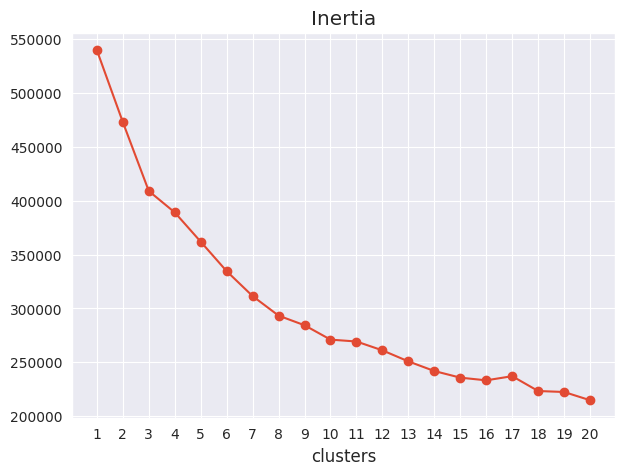

In [39]:
fig7, ax7 = plt.subplots(figsize=(7, 5))

ax7.plot(num_clusters, inertias, '-o')
ax7.set(xticks=num_clusters, xlabel='clusters', title='Inertia')
fig7.savefig('figure_07.png')

##### The choice of the number of clusters is always a trade-off to minimise inertia and to keep the number of clusters as low as possible. In this case, it makes sense to choose **12** as the number of clusters.
The sklearn algorithm assigns to each point (_user_) a label, found with the attribute labels_, that we assign to a new column **'membership'** in our dataframe.

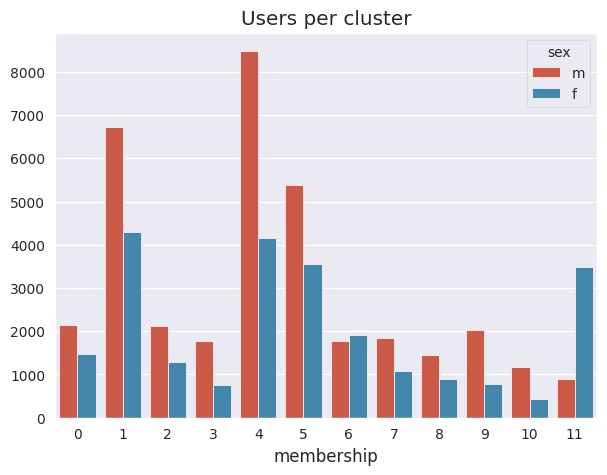

In [40]:
k = 12
model = KMeans(n_clusters = k, n_init='auto')
model.fit(X_scaled)
df['membership'] = model.labels_
df.membership.value_counts()

fig8, ax8 = plt.subplots(figsize=(7, 5))

sns.countplot(data=df, x='membership', ax=ax8, hue='sex')
ax8.set(title = 'Users per cluster', ylabel='');
fig8.savefig('figure_08.png')

## Lover recommendation. An example

Features of interest we are considering:

In [41]:
features = ['age', 'height', 'sex', 'orientation', 'sex', 'orientation', 'body_type_', 
 'education_', 'drinks_', 'drugs_', 'smokes_', 'likes_dogs_', 'likes_cats_', 
 'membership']

Let's say that we want to recommend profiles that user_id 42 can be interested in. This user is a male, with sexual orientation 'straight', and now is easy to find potential lovers for this user.

In [42]:
df.loc[42:42,features]

,age,height,sex,orientation,sex,orientation,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_,membership
42,30,190.0,m,straight,m,straight,mesomorph,College or more,often,sometimes,no,No,No,3


In [43]:
users = df.loc[(df.sex == 'f') & 
               (df.membership == df.at[42, 'membership']) & 
               (df.orientation == 'straight')].index
print(f'And so we have found {len(users)} female users in the same cluster.\n ')

And so we have found 539 female users in the same cluster.
 


### Distances
Now we can prepare an ordered list based on affinitty. First of all we need to calculate the distance between user 42 and the rest of profiles we have just found. 

In [44]:
def distance(row, user):
    result = 0
    for i, v in enumerate(row):
        result += (v - user[i])**2
    return result ** 0.5; 

In [45]:
user = X_scaled.loc[42]
distances = X_scaled.loc[users].apply(distance, axis = 1, args=(user,) ).sort_values();

In [46]:
df.loc[42:42, features]

,age,height,sex,orientation,sex,orientation,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_,membership
42,30,190.0,m,straight,m,straight,mesomorph,College or more,often,sometimes,no,No,No,3


In [47]:
df.loc[distances.index, features].head(10)

,age,height,sex,orientation,sex,orientation,body_type_,education_,drinks_,drugs_,smokes_,likes_dogs_,likes_cats_,membership
31343,25,183.0,f,straight,f,straight,mesomorph,College or more,often,sometimes,no,No,No,3
55767,30,175.0,f,straight,f,straight,mesomorph,College or more,often,sometimes,no,No,No,3
13776,32,175.0,f,straight,f,straight,mesomorph,College or more,often,sometimes,no,No,No,3
16932,25,175.0,f,straight,f,straight,mesomorph,College or more,often,sometimes,no,No,No,3
42326,25,175.0,f,straight,f,straight,mesomorph,College or more,often,sometimes,no,No,No,3
33695,33,173.0,f,straight,f,straight,mesomorph,College or more,often,sometimes,no,No,No,3
5879,34,173.0,f,straight,f,straight,mesomorph,College or more,often,sometimes,no,No,No,3
40510,25,173.0,f,straight,f,straight,mesomorph,College or more,often,sometimes,no,No,No,3
27386,21,175.0,f,straight,f,straight,mesomorph,College or more,often,sometimes,no,No,No,3
57489,44,178.0,f,straight,f,straight,mesomorph,College or more,often,sometimes,no,No,No,3


We can see that the the features are pretty similar.

### Affinity

We can calculate affinity (similarity) with this [formula](https://scikit-learn.org/stable/modules/metrics.html):

S = np.exp(-D * gamma), where D is the distance between the two data points, and gamma is 1 / num_features.

In [48]:
gamma = 1 /(len(features))

And now we can print the top ten choices for the user 42 with a similarity score:

In [49]:
S = pd.DataFrame(distances.apply(lambda x: round(np.exp(-x * gamma)*100,1)).rename('affinity'))
S.rename_axis('user_id', inplace=True)
print('Top ten users by affinity with user_id = 42')
S.head(10)

Top ten users by affinity with user_id = 42


,affinity
user_id,
31343,94.0
55767,89.9
13776,89.8
16932,89.4
42326,89.4
33695,88.5
5879,88.3
40510,88.2
27386,88.2
